In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for data analysis, modeling, and evaluation.
import scipy # A library for scientific computing and technical computing, often used for statistical analysis and optimization.
import datetime # Library for working with dates and times in Python.
import folium # Python library that allows users to create interactive maps and visualizations from geospatial data.
import plotly.graph_objs as go
from tabulate import tabulate  #function can be used to convert data, such as lists or pandas DataFrames, into a formatted table
from tqdm import tqdm # put tqdm in front of range() #library allows you to visualize the progress of your code execution.

pd.set_option('display.max_columns',500) 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Chart for Null values in data
def nullchart(df):
    null_appDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    null_appDF.columns = ['Column Name', 'Null Values Percentage']
    fig = plt.figure(figsize=(18,6))
    ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color='blue')
    plt.xticks(rotation =90,fontsize =7)
    ax.axhline(40, ls='--',color='red')
    plt.title("Percentage of Missing values in data")
    plt.ylabel("Null Values PERCENTAGE")
    plt.xlabel("COLUMNS")
    plt.show()

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv", index_col='id')
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

# Domain Information, Feature Ideas, and References

## Domain Elements

1. **BMI**
   - It is the ratio of weight (kg) / height (metre-squared).
   - BMI < 18.5 - Underweight
   - BMI between 18.5-24.99 - Normal
   - BMI between 25-29.99 - Overweight
   - BMI between 30-34.99 - Obese - grade 1
   - BMI between 35-39.99 - Obese - grade 2
   - BMI >= 40.00 - Obese - grade 3
   - [More information](https://en.wikipedia.org/wiki/Basal_metabolic_rate)
   - [More information](https://www.healthline.com/health/what-is-basal-metabolic-rate)

2. **Waist Circumference and Obesity**
   - For men:
     - below 94cm (37in) - low risk
     - 94–102cm (37-40in) - high risk
     - more than 102cm (40in) - very high
   - For women:
     - below 80cm (31.5in) - low risk
     - 80–88cm (31.5-34.6in) - high risk
     - more than 88cm (34.6in) - very high
   - [More information](https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/measuring-your-waist#:~:text=Why%20does%20your%20waist%20measurement,excess%20fat%20inside%20your%20organs)
   - [More information](https://www.hsph.harvard.edu/obesity-prevention-source/obesity-definition/abdominal-obesity/)

3. **Age and Health Risk**
   - Age < 45 - lower risk
   - Age >= 45 years - high risk (as per ACSM norms)
   
4. **Blood Pressure Classification**
   - Systolic BP and Diastolic BP classifications.
   - [More information](https://www.heart.org/en/health-topics/high-blood-pressure)
   - [More information](https://www.msdmanuals.com/professional/multimedia/table/classification-of-blood-pressure-in-adults)

5. **HDL-LDL Cholesterol Classification**
   - Total cholesterol, HDL, and LDL classifications.
   - [More information](https://medlineplus.gov/lab-tests/cholesterol-levels/)
   - ASCM guidelines

6. **Triglyceride Classification**
   - Triglyceride level classifications.
   - [More information](https://www.ncbi.nlm.nih.gov/books/NBK459368/#:~:text=According%20to%20National%20Cholesterol%20Education,TG%20%3E%20500%20mg%2FdL)

7. **Haemoglobin Classification for Anemic Cases**
   - Haemoglobin level classifications for different groups.
   - [More information](https://www.who.int/data/nutrition/nlis/info/anaemia)
   - [More information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9448346/)

8. **Creatinine Normal Range**
   - Normal creatinine range for adults.
   - [More information](https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646)
   - [More information](https://www.medicalnewstoday.com/articles/322380)

9. **γ-GTP Normal Levels**
   - Normal range for adults and risk levels.
   - [More information](https://www.ucsfhealth.org/medical-tests/gamma-glutamyl-transferase-(ggt)-blood-test)
   - [More information](https://my.clevelandclinic.org/health/diagnostics/22055-gamma-glutamyl-transferase-ggt-test)

10. **AST-ALT Levels**
    - Normal range for SGOT test and associated risks.
    - [More information](https://www.healthline.com/health/sgot-test)
    - [More information](https://www.medicalnewstoday.com/articles/320982)

11. **Dental Caries**
    - Dental caries classification and relevant information.
    - [More information](https://dimensionsofdentalhygiene.com/article/caries-classification/)
    - [More information](https://academicworks.cuny.edu/cgi/viewcontent.cgi?article=1060&context=ho_pubs)
    - [More information](https://jada.ada.org/article/S0002-8177(14)00029-4/fulltext)

## Similar Playground Challenge
**Binary Classification with a Tabular Stroke Prediction Dataset**

### Kernels
- [Kaggle Kernel 1](https://www.kaggle.com/code/dmitryuarov/ps-s3e2-catboost-lasso-nn-fiasco)
- [Kaggle Kernel 2](https://www.kaggle.com/code/tilii7/modeling-stroke-dataset-with-lasso-regression)
- [Kaggle Kernel 3](https://www.kaggle.com/code/usharengaraju/tfdf-rf-proximities-projections-w-b)
- [Kaggle Kernel 4](https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e2-2023-eda-and-base-pytorch-model)

### High Scoring Approaches
- [High Scoring Approach 1](https://www.kaggle.com/competitions/playground-series-s3e2/discussion/378780)
- [High Scoring Approach 2](https://www.kaggle.com/competitions/playground-series-s3e2/discussion/378866)
- [High Scoring Approach 3](https://www.kaggle.com/competitions/playground-series-s3e2/discussion/381377)


# we can drop id, check corelation between somking and age, or dental caries could be importment, or urine protein, .

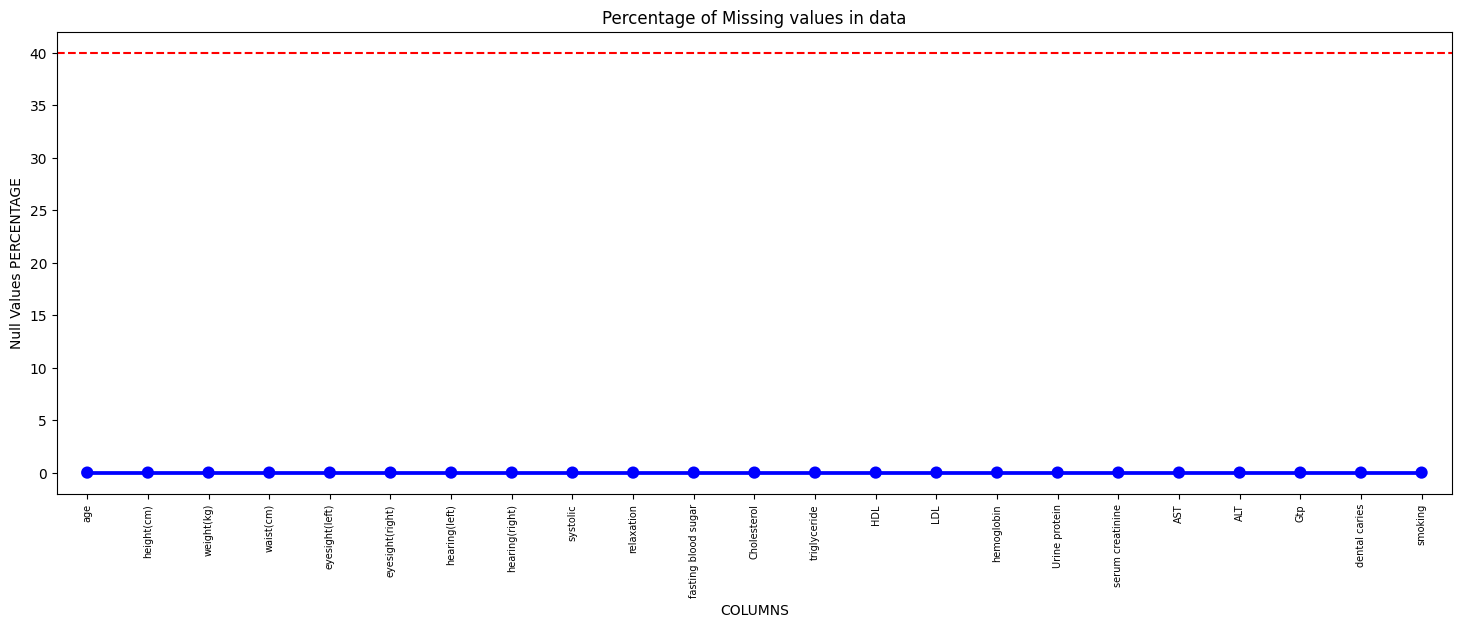

In [4]:
nullchart(train)

In [5]:
from pathlib import Path

# Installed packages
from ipywidgets import widgets
#!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
# Our package
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file


# Generate the Profiling Report
profile = ProfileReport(
    train, title="Dataset", html={"style": {"full_width": True}}, sort=None
)
#profile

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#feature = ['age','height(cm)','weight(kg)','waist(cm)','triglyceride','HDL','hemoglobin']
feature = ['height(cm)','weight(kg)','waist(cm)','triglyceride','hemoglobin']

# Train
X = train[feature]
y = train['smoking']


# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 2: Create and train a Logistic Regression model
logistic_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                  intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', 
                                  max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)
logistic_reg.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = logistic_reg.predict(X_test)

# Step 4: Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7261396458621122
